https://qiita.com/God_KonaBanana/items/10fa8bb58cdd1dbd2e59

In [1]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.core import Dense,Activation,Dropout,Flatten
from keras.datasets import cifar10
from keras.utils import np_utils

#cifar10をダウンロード
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

#画像を0-1の範囲で正規化
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

#正解ラベルをOne-Hot表現に変換
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

Using TensorFlow backend.


In [2]:
#モデルを構築
model=Sequential()

model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(x_train,y_train,batch_size=128,nb_epoch=20,verbose=1,validation_split=0.1)

#モデルと重みを保存
json_string=model.to_json()
open('cifar10_cnn.json',"w").write(json_string)
model.save_weights('cifar10_cnn.h5')

#モデルの表示
model.summary()

#評価
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

/Users/hosokawanaoki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 147s 3ms/step - loss: 1.6583 - acc: 0.3908 - val_loss: 1.2818 - val_acc: 0.5354
Epoch 2/20
45000/45000 [==============================] - 142s 3ms/step - loss: 1.2499 - acc: 0.5508 - val_loss: 1.0470 - val_acc: 0.6332
Epoch 3/20
45000/45000 [==============================] - 143s 3ms/step - loss: 1.0784 - acc: 0.6181 - val_loss: 0.9262 - val_acc: 0.6790
Epoch 4/20
45000/45000 [==============================] - 143s 3ms/step - loss: 0.9604 - acc: 0.6594 - val_loss: 0.8472 - val_acc: 0.7032
Epoch 5/20
45000/45000 [==============================] - 142s 3ms/step - loss: 0.8821 - acc: 0.6896 - val_loss: 0.7921 - val_acc: 0.7190
Epoch 6/20
45000/45000 [==============================] - 139s 3ms/step - loss: 0.8071 - acc: 0.7160 - val_loss: 0.7820 - val_acc: 0.7260
Epoch 7/20
45000/45000 [==============================] - 138s 3ms/step - loss: 0.7532 - acc: 0.7343 - val_loss: 0.6925 - v

In [3]:
from keras.models import model_from_json
from keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np

#cifar10をダウンロード
(_,_),(x_test_img,y_test_img)=cifar10.load_data()

#画像を0-1の範囲で正規化
x_test=x_test_img.astype('float32')/255.0

#正解ラベルをOne-Hot表現に変換
y_test=np_utils.to_categorical(y_test_img,10)

#学習済みのモデルと重みを読み込む
json_string=open('cifar10_cnn.json').read()
model=model_from_json(json_string)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.load_weights('cifar10_cnn.h5')

#モデルを表示
model.summary()

#評価
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

#predict_classesで画像のクラスを予想する
img_pred=model.predict_classes(x_test)

#5x5枚の画像を表示する
plt.figure(figsize=(10,10))
for i in range(25):
    rand_num=np.random.randint(0,10000)
    cifar_img=plt.subplot(5,5,i+1)
    plt.imshow(x_test_img[rand_num])
    #x軸の目盛りを消す
    plt.tick_params(labelbottom='off')
    #y軸の目盛りを消す
    plt.tick_params(labelleft='off')
    #画像の予想
    plt.title('pred:{0},ans:{1}'.format(img_pred[rand_num],y_test_img[rand_num]))


plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
__________

/Users/hosokawanaoki/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 1000x1000 with 25 Axes>

In [1]:
temp_img=load_img("kumamon.jpg",target_size=(32,32))


NameError: name 'load_img' is not defined

In [2]:
#画像を配列に変換し0-1で正規化
temp_img_array=img_to_array(temp_img)
temp_img_array=temp_img_array.astype('float32')/255.0
temp_img_array=temp_img_array.reshape((1,32,32,3))

#学習済みのモデルと重みを読み込む
json_string=open('cifar10_cnn.json').read()
model=model_from_json(json_string)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.load_weights('cifar10_cnn.h5')

#モデルを表示
model.summary()

#画像を予想
img_pred=model.predict_classes(temp_img_array)
print('\npredict_classes=',img_pred)

plt.imshow(temp_img)
plt.title('pred:{}'.format(img_pred))
plt.show()

NameError: name 'img_to_array' is not defined

In [3]:
temp_img=load_img("model3.png",target_size=(32,32))

NameError: name 'load_img' is not defined

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
__________

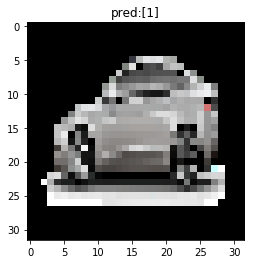

In [11]:
#画像を配列に変換し0-1で正規化
temp_img_array=img_to_array(temp_img)
temp_img_array=temp_img_array.astype('float32')/255.0
temp_img_array=temp_img_array.reshape((1,32,32,3))

#学習済みのモデルと重みを読み込む
json_string=open('cifar10_cnn.json').read()
model=model_from_json(json_string)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.load_weights('cifar10_cnn.h5')

#モデルを表示
model.summary()

#画像を予想
img_pred=model.predict_classes(temp_img_array)
print('\npredict_classes=',img_pred)

plt.imshow(temp_img)
plt.title('pred:{}'.format(img_pred))
plt.show()